# Heart Failure Predictions

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\jayesh\Downloads\archive (21)\heart_failure_clinical_records_dataset.csv")


# Data Preprocessing 

In [3]:
 #showing shape of data

rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")


Number Of Rows : 299
Number Of Columns : 13


In [4]:
# Showing Sample of Data

df.sample(1).iloc[0]

age                             60.0
anaemia                          1.0
creatinine_phosphokinase       260.0
diabetes                         1.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   255000.0
serum_creatinine                 2.2
serum_sodium                   132.0
sex                              0.0
smoking                          1.0
time                            45.0
DEATH_EVENT                      1.0
Name: 54, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [7]:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: >

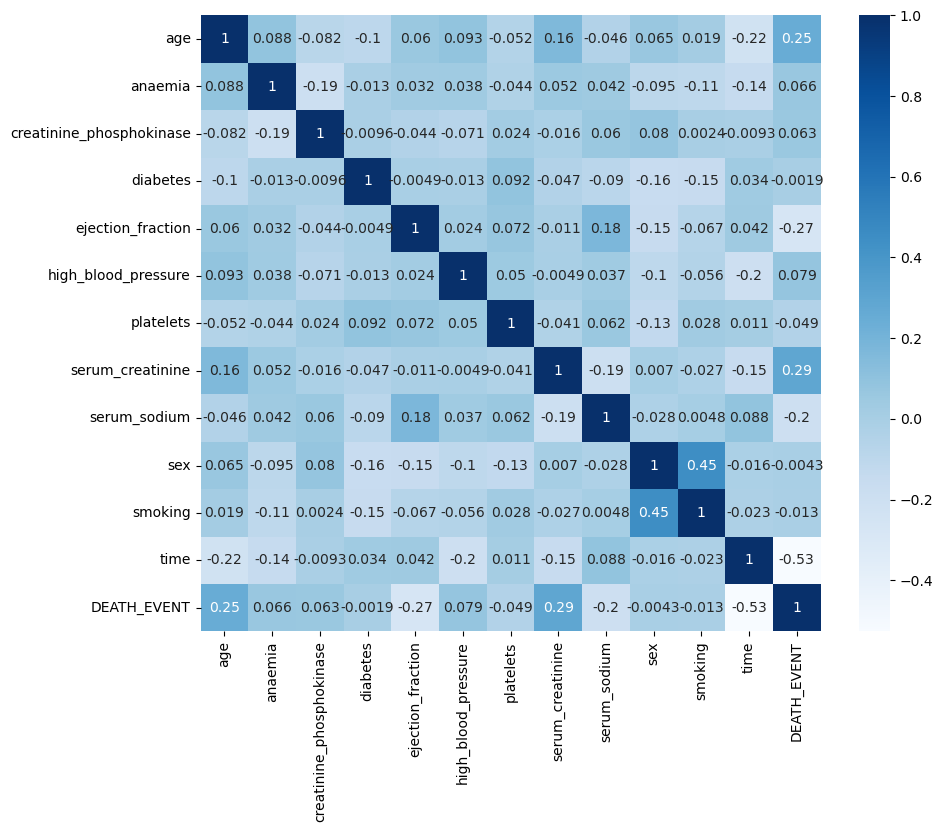

In [9]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

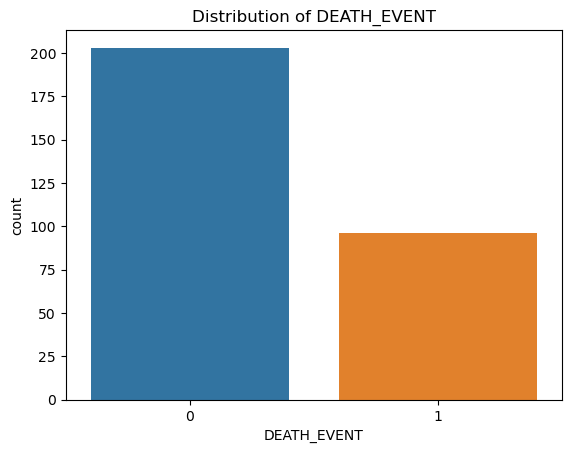

In [10]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.show()


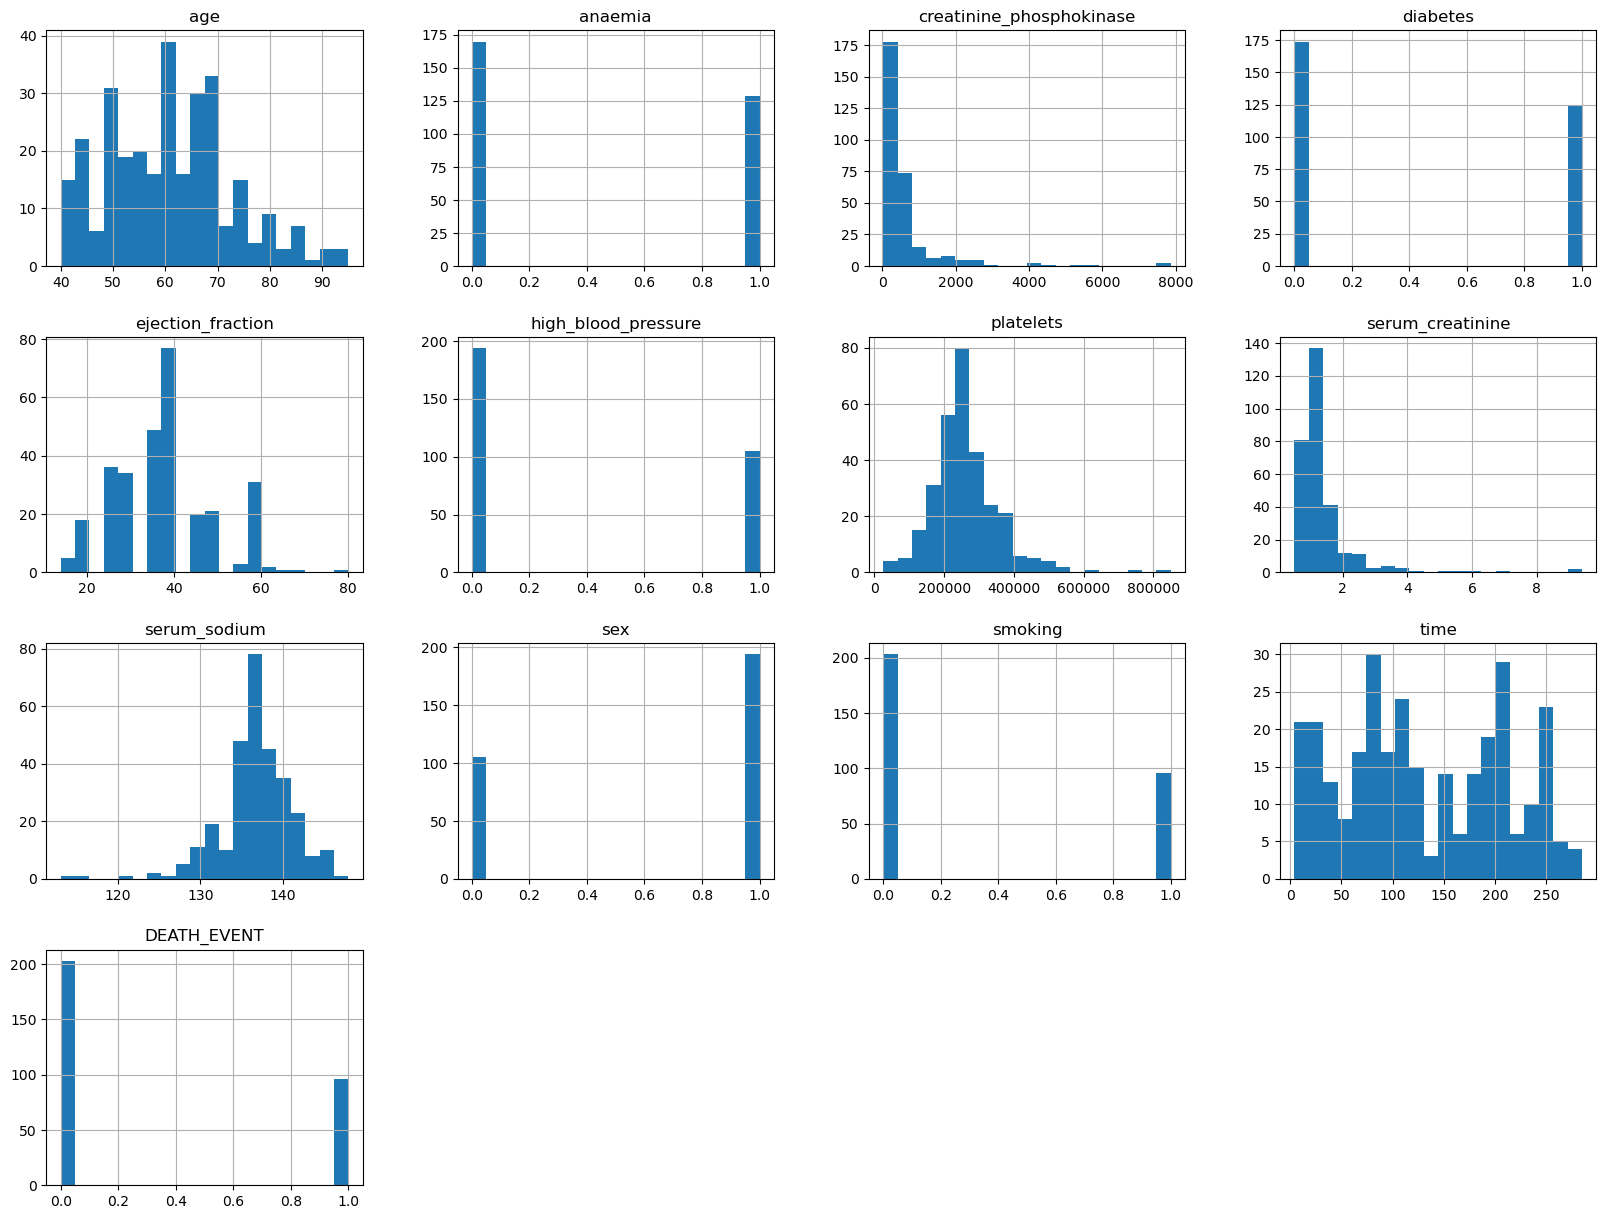

In [11]:
df.hist(bins=20, figsize=(20, 15))
plt.show()


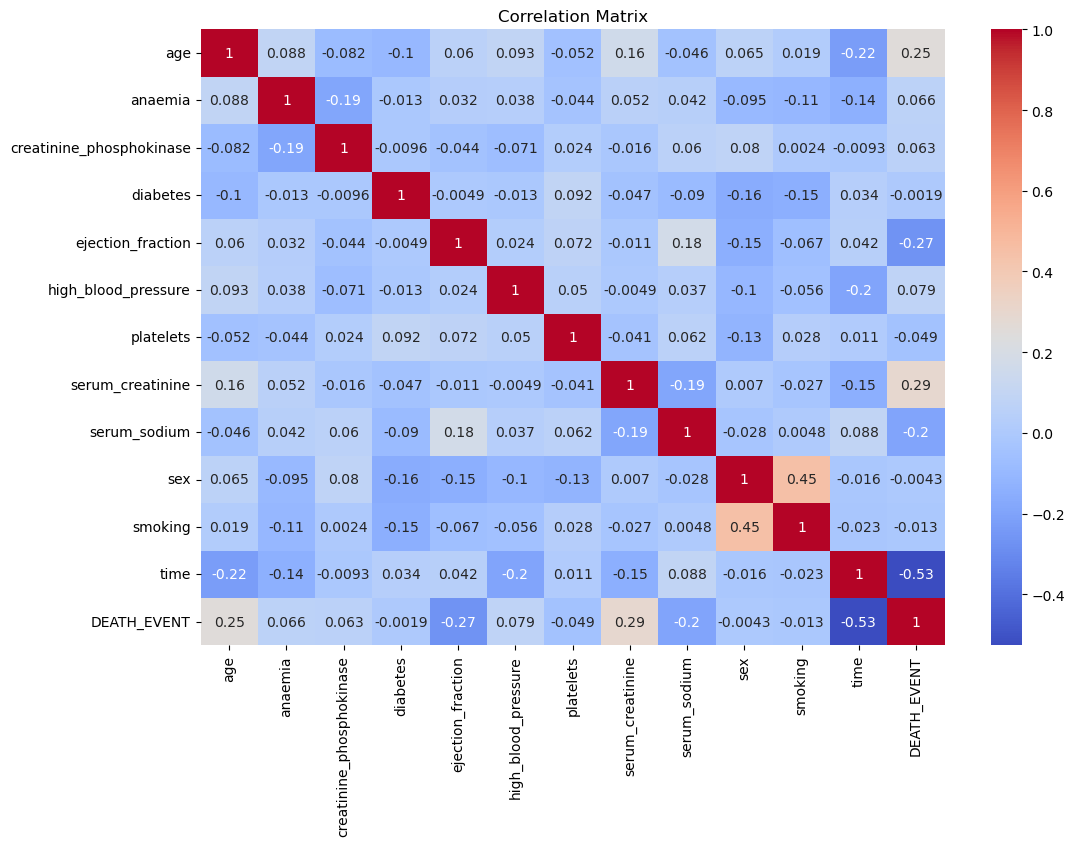

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


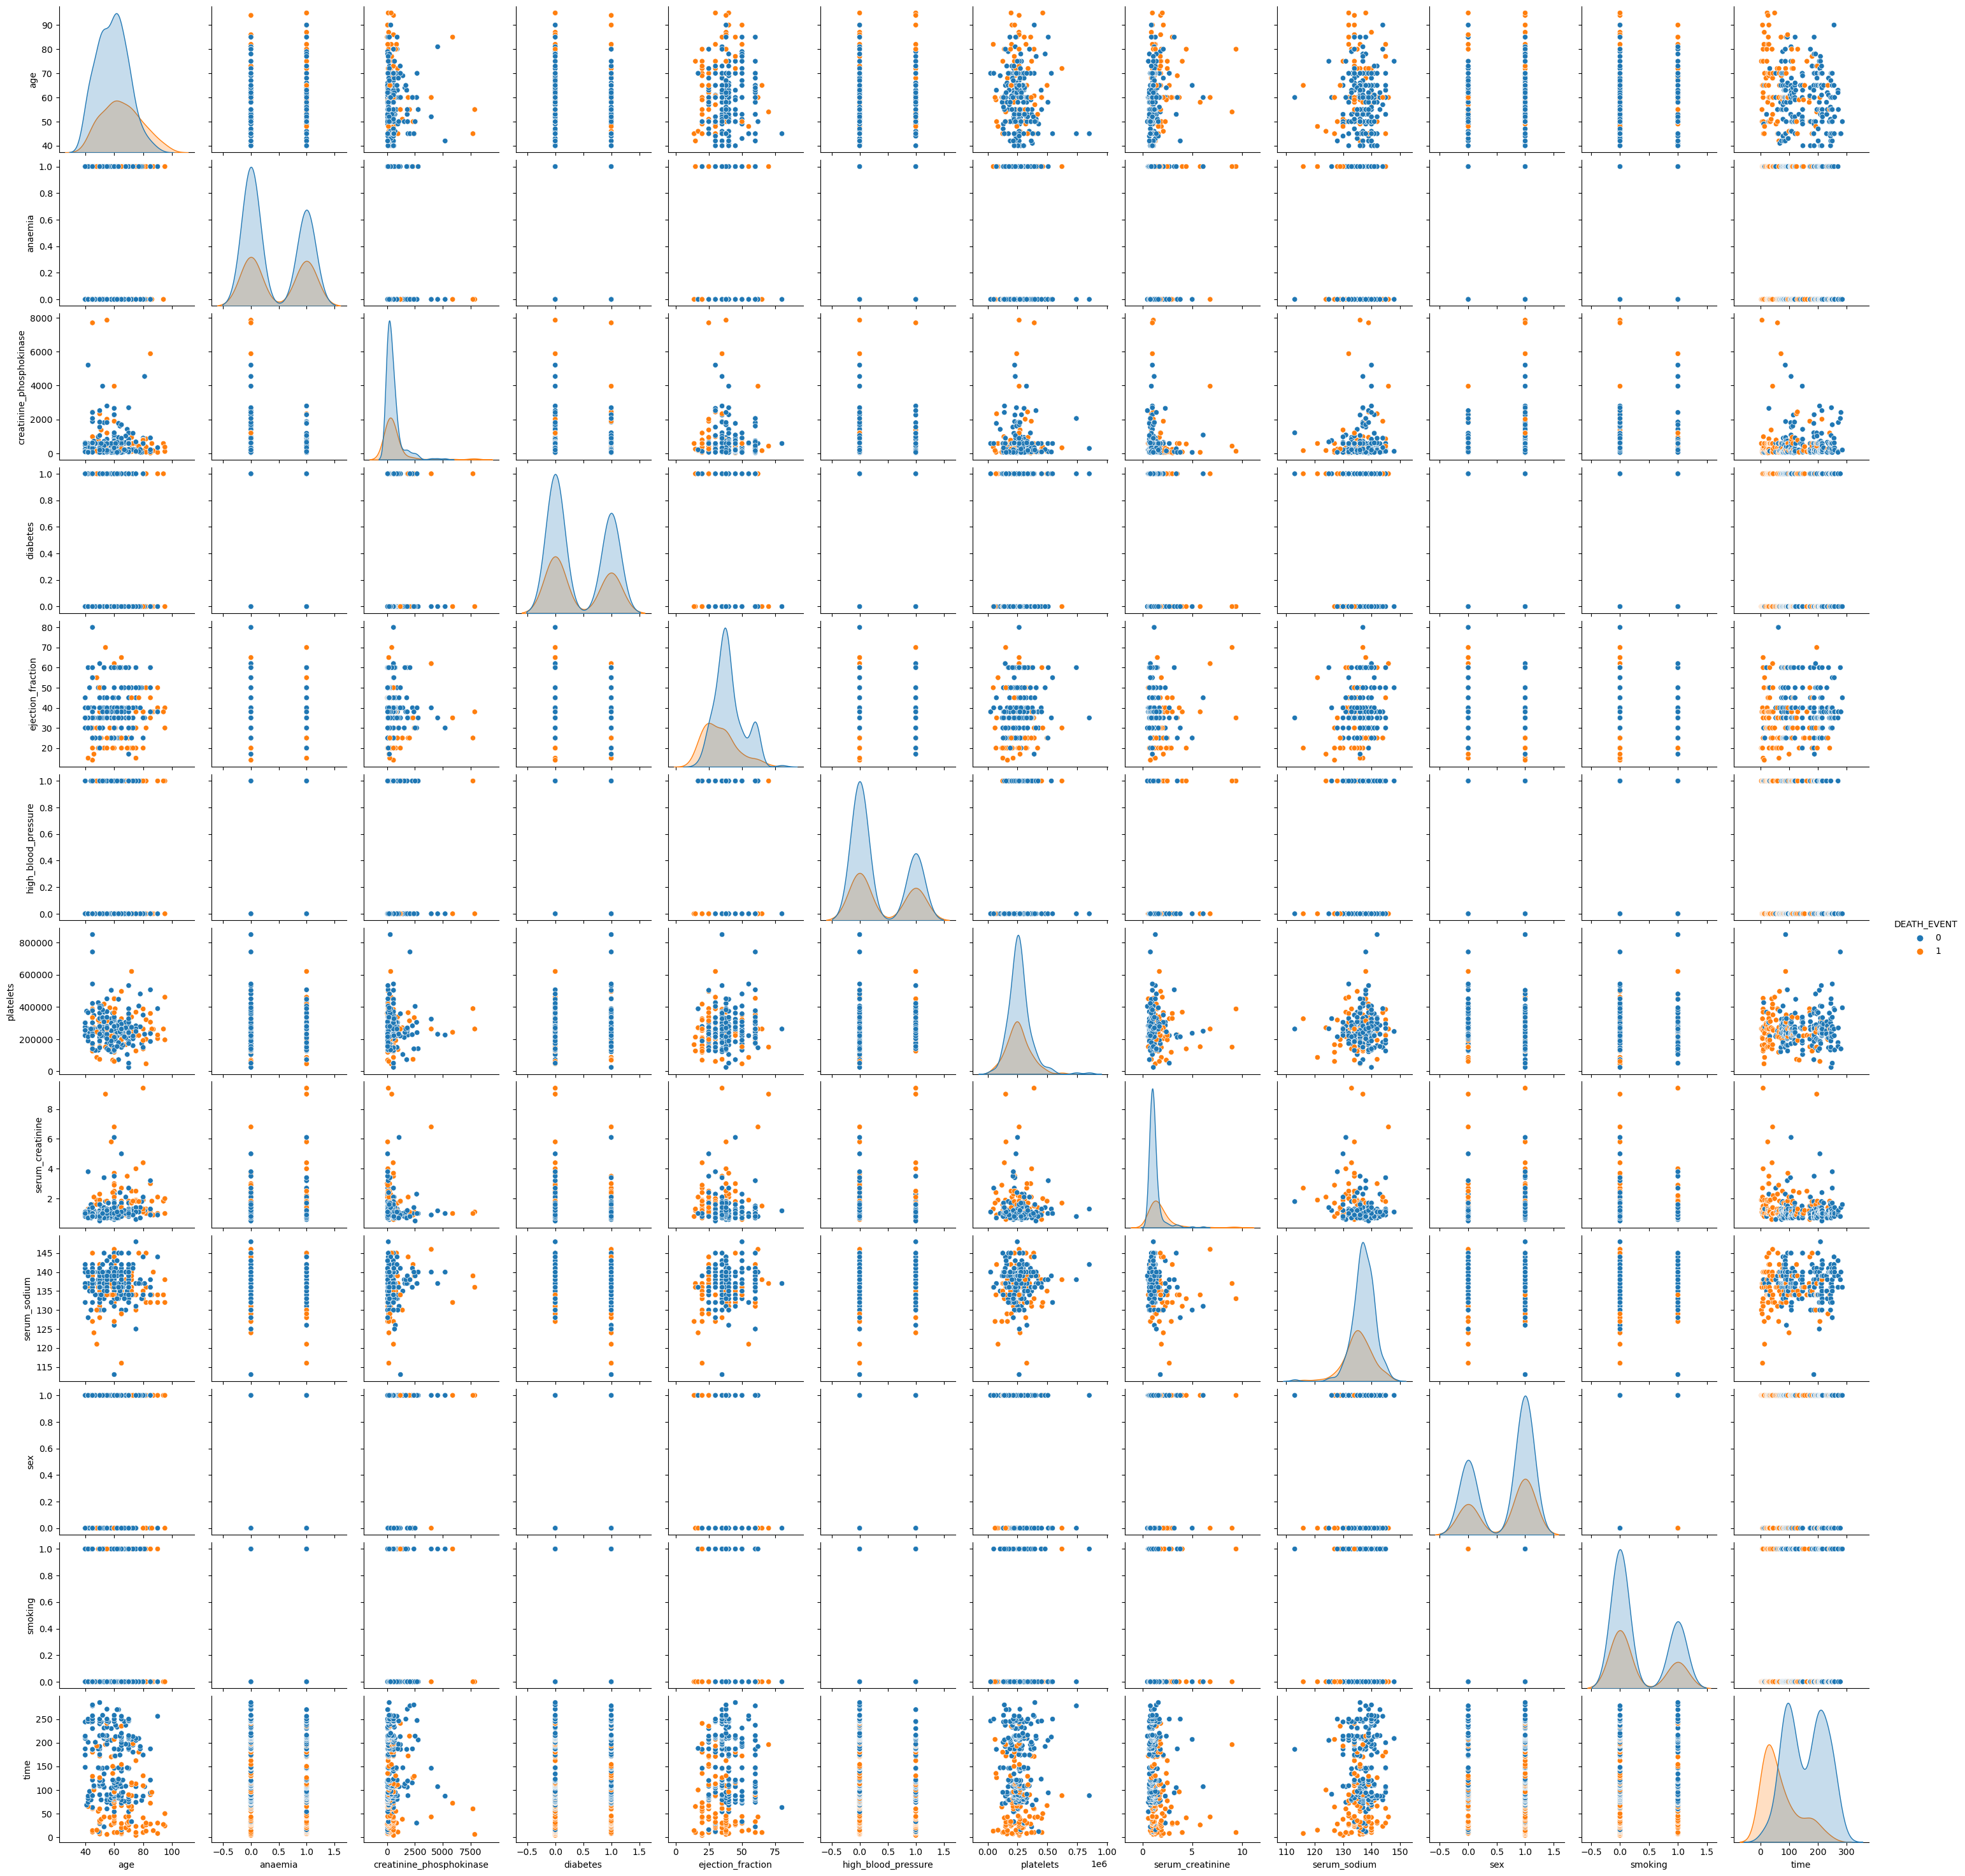

In [13]:
sns.pairplot(df, hue='DEATH_EVENT')
plt.show()


[0.0858816  0.02753272 0.07157166 0.03180792 0.12813461 0.02382006
 0.071979   0.12241103 0.08584355 0.025544   0.02768266 0.29779119]


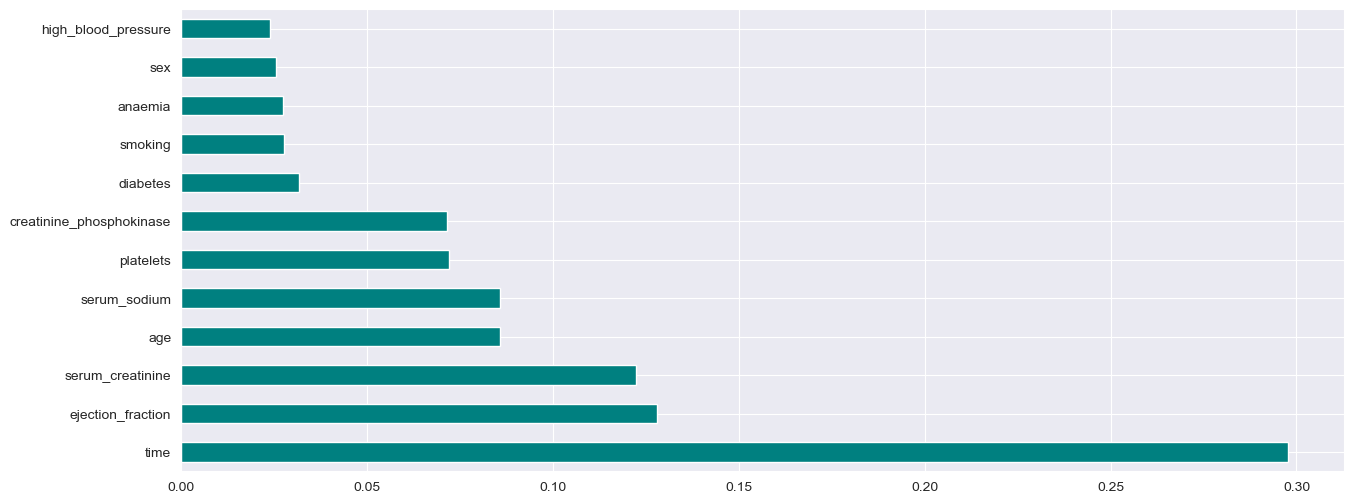

In [14]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='teal')
plt.show()

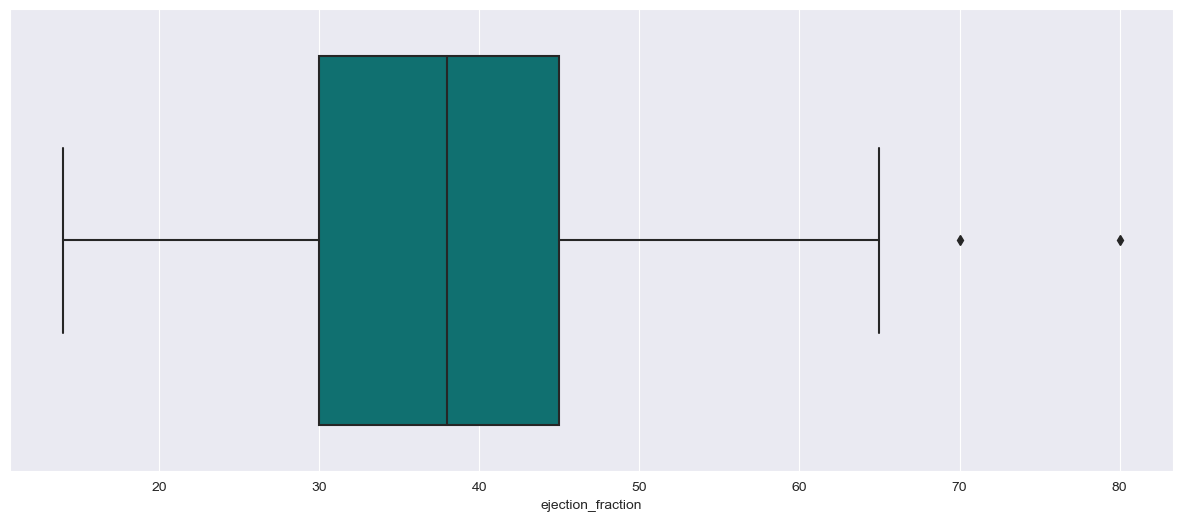

In [15]:
# Boxplot for ejection_fraction

sns.boxplot(x = df.ejection_fraction, color='teal')
plt.show()


In [16]:
# Removing outliers

df[df['ejection_fraction'] >= 70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [17]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

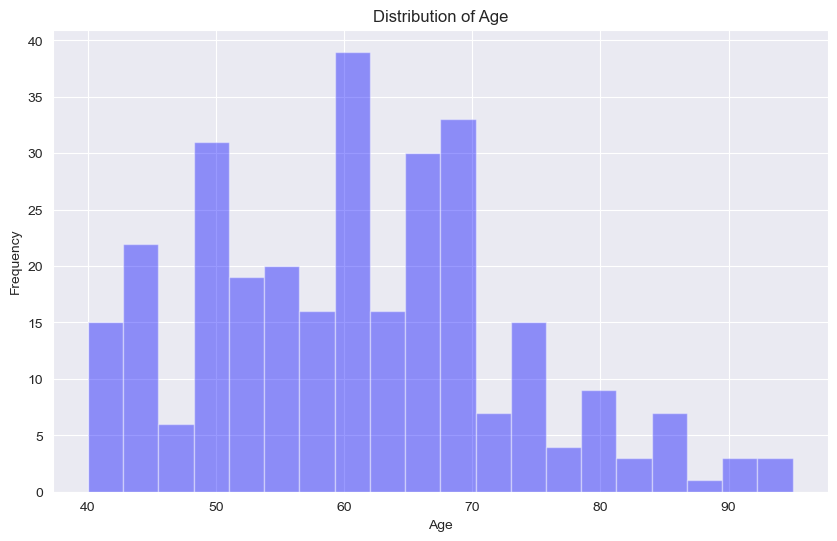

In [18]:
plt.figure(figsize=(10, 6))
sns.distplot(df['age'], bins=20, kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


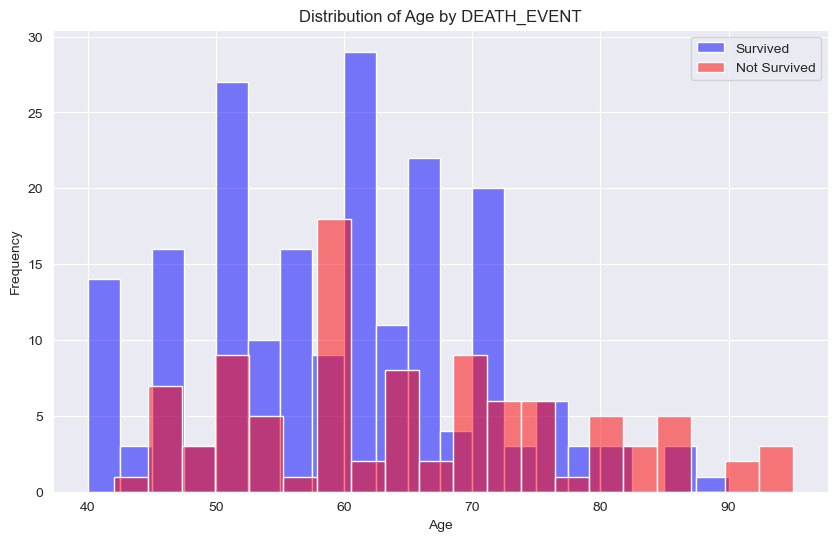

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['DEATH_EVENT'] == 0]['age'], bins=20, color='blue', label='Survived', alpha=0.5)
sns.histplot(df[df['DEATH_EVENT'] == 1]['age'], bins=20, color='red', label='Not Survived', alpha=0.5)
plt.title('Distribution of Age by DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


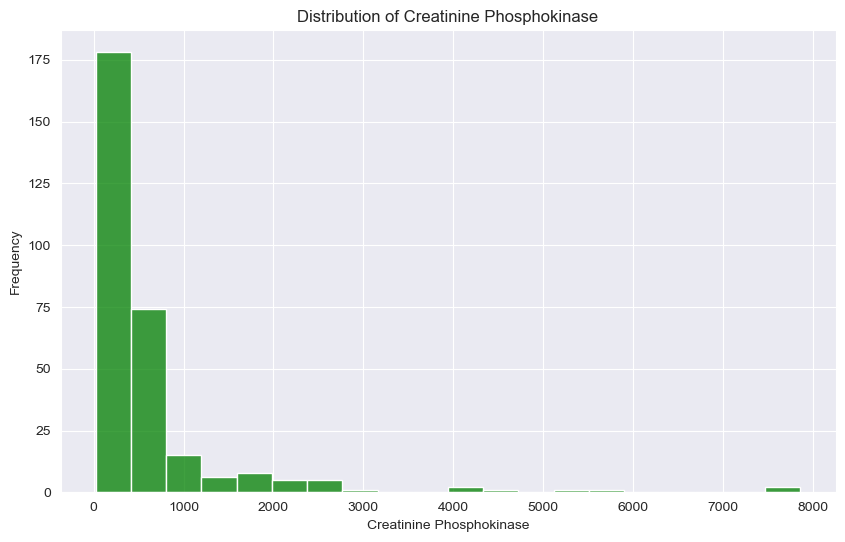

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['creatinine_phosphokinase'], bins=20, color='green')
plt.title('Distribution of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.show()


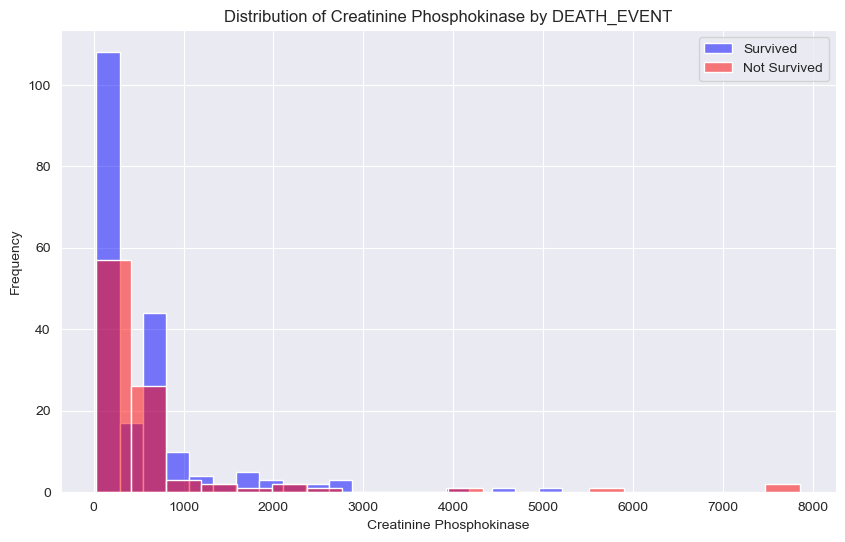

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase'], bins=20, color='blue', label='Survived', alpha=0.5)
sns.histplot(df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'], bins=20, color='red', label='Not Survived', alpha=0.5)
plt.title('Distribution of Creatinine Phosphokinase by DEATH_EVENT')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [22]:
import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [23]:
import plotly.graph_objects as go

# Create histogram traces for each DEATH_EVENT category
trace_survived = go.Histogram(x=df[df['DEATH_EVENT'] == 0]['ejection_fraction'], 
                              name='Survived', 
                              opacity=0.5, 
                              marker_color='blue')
trace_not_survived = go.Histogram(x=df[df['DEATH_EVENT'] == 1]['ejection_fraction'], 
                                  name='Not Survived', 
                                  opacity=0.5, 
                                  marker_color='red')

# Create layout
layout = go.Layout(title='Distribution of Ejection Fraction by DEATH_EVENT',
                   xaxis=dict(title='Ejection Fraction'),
                   yaxis=dict(title='Frequency'),
                   barmode='overlay')

# Create figure
fig = go.Figure(data=[trace_survived, trace_not_survived], layout=layout)

# Show figure
fig.show()


In [24]:
import plotly.express as px
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [25]:
import plotly.graph_objects as go

# Gender distribution in the dataset
gender_counts = df['sex'].value_counts()
labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(title='Gender Distribution in Dataset')
fig.show()


In [26]:
# Gender vs Death Events
gender_death_counts = df.groupby(['sex', 'DEATH_EVENT']).size().unstack()
gender_death_counts.reset_index(inplace=True)

fig = go.Figure()

fig.add_trace(go.Pie(labels=gender_death_counts['sex'], 
                     values=gender_death_counts[1], 
                     name='Not Survived', 
                     hole=0.3, 
                     domain={'x': [0, 0.45]}))

fig.add_trace(go.Pie(labels=gender_death_counts['sex'], 
                     values=gender_death_counts[0], 
                     name='Survived', 
                     hole=0.3, 
                     domain={'x': [0.55, 1]}))

fig.update_layout(title='Gender vs Death Events',
                  annotations=[dict(text='Not Survived', x=0.2, y=0.5, font_size=12, showarrow=False),
                               dict(text='Survived', x=0.8, y=0.5, font_size=12, showarrow=False)])
fig.show()


In [27]:
import plotly.graph_objects as go

# Group data by gender and death event
gender_death_counts = df.groupby(['sex', 'DEATH_EVENT']).size().unstack()
gender_death_counts.reset_index(inplace=True)

# Donut chart for survival counts by gender
fig1 = go.Figure()

fig1.add_trace(go.Pie(labels=gender_death_counts['sex'], 
                      values=gender_death_counts[0], 
                      name='Survived', 
                      hole=0.3))

fig1.update_layout(title='Survival Counts by Gender',
                   annotations=[dict(text='Survived', x=0.5, y=0.5, font_size=12, showarrow=False)])
fig1.show()

# Donut chart for death counts by gender
fig2 = go.Figure()

fig2.add_trace(go.Pie(labels=gender_death_counts['sex'], 
                      values=gender_death_counts[1], 
                      name='Not Survived', 
                      hole=0.3))

fig2.update_layout(title='Death Counts by Gender',
                   annotations=[dict(text='Not Survived', x=0.5, y=0.5, font_size=12, showarrow=False)])
fig2.show()


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

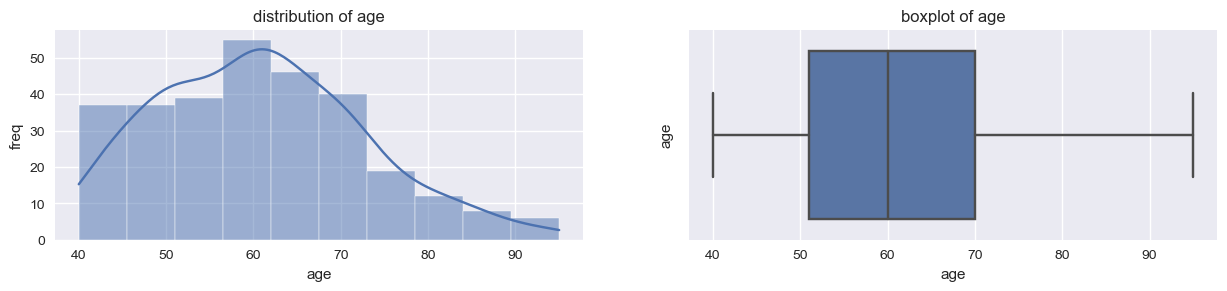

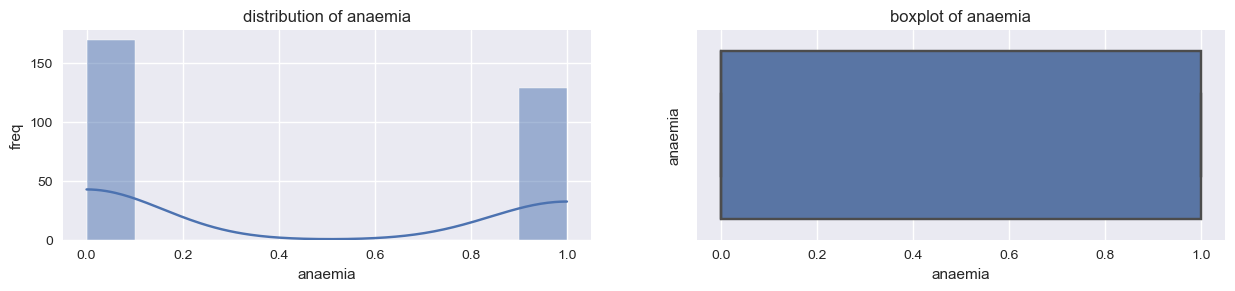

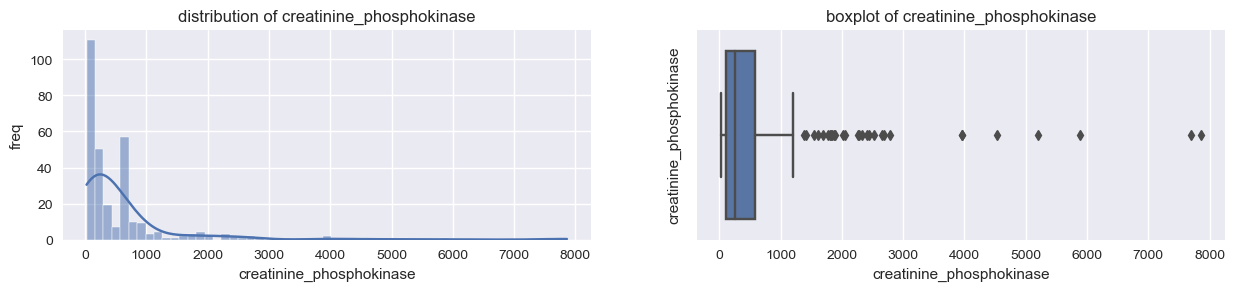

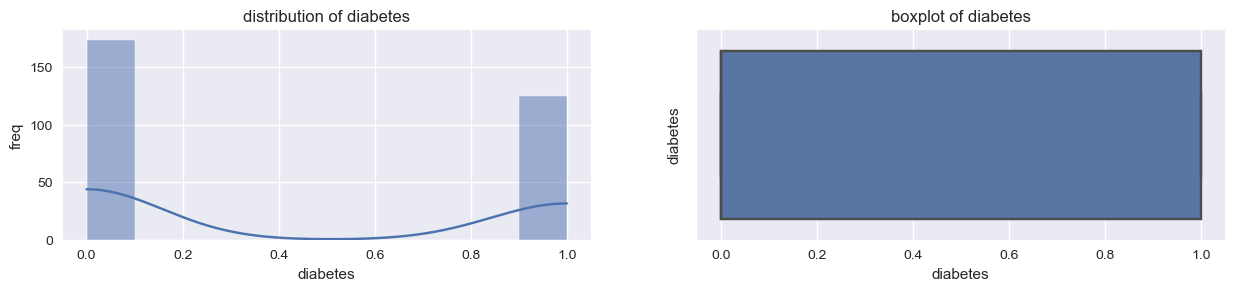

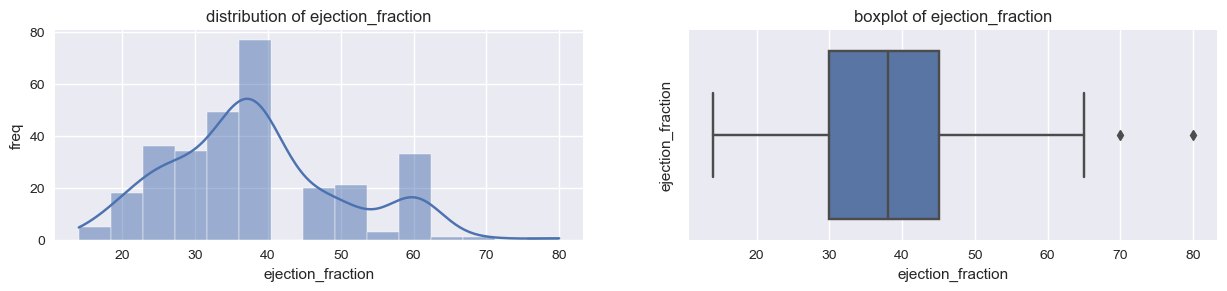

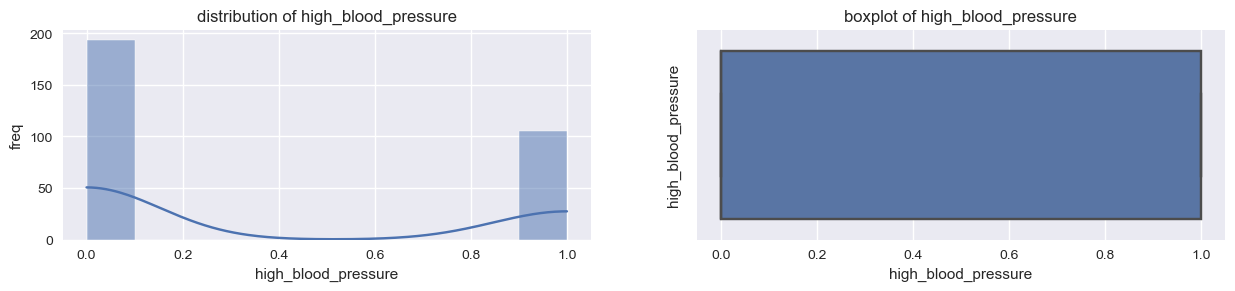

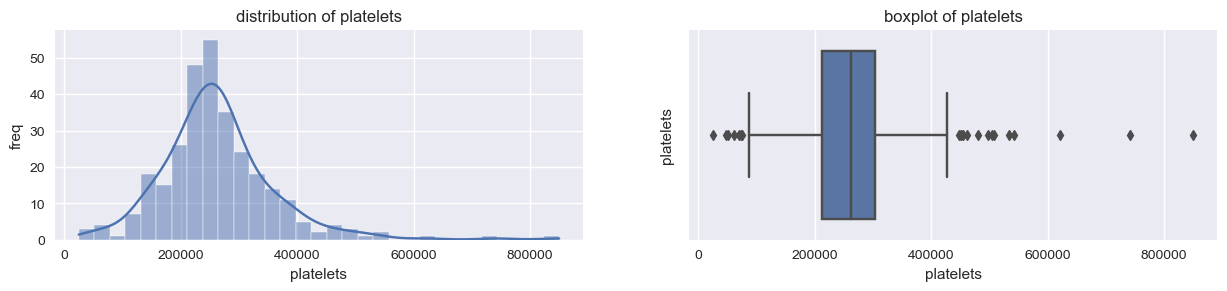

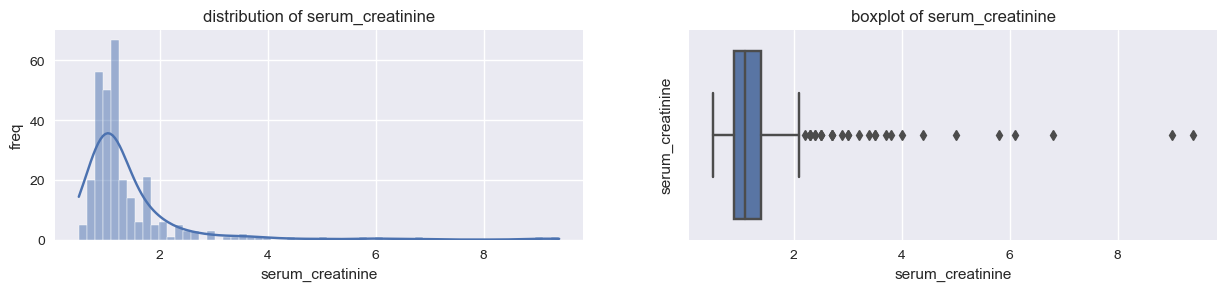

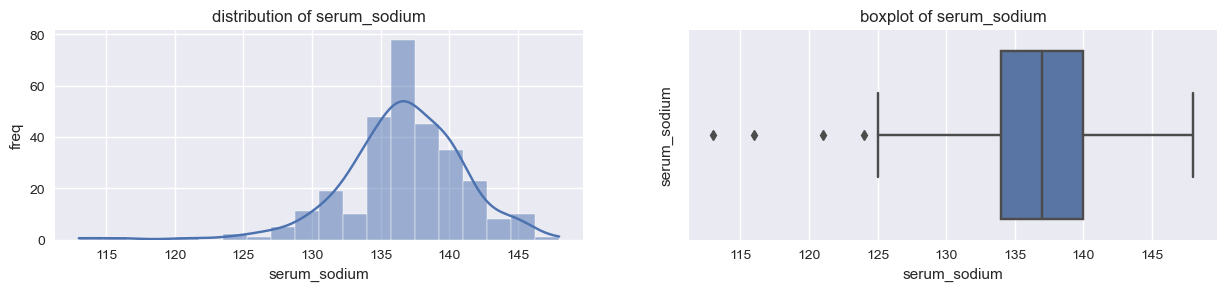

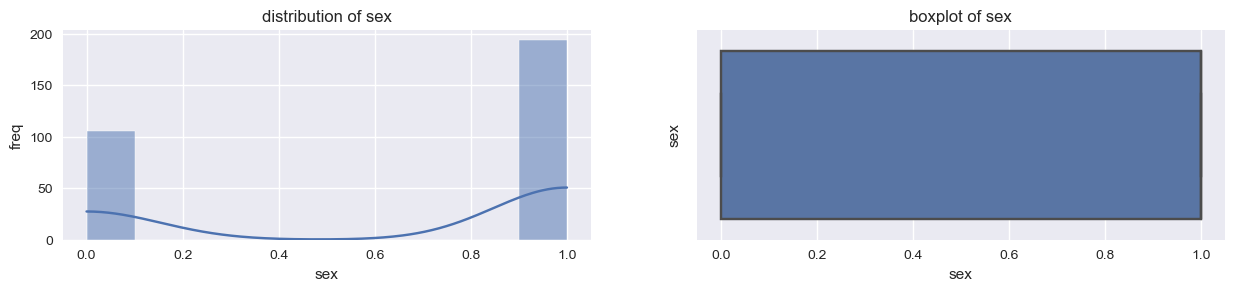

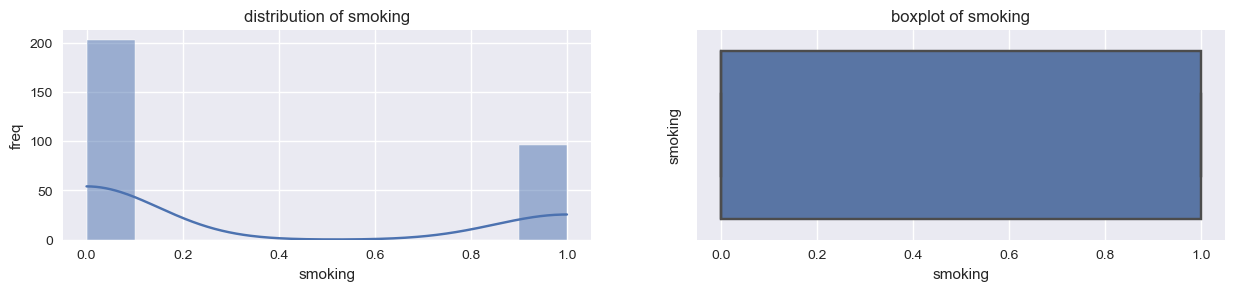

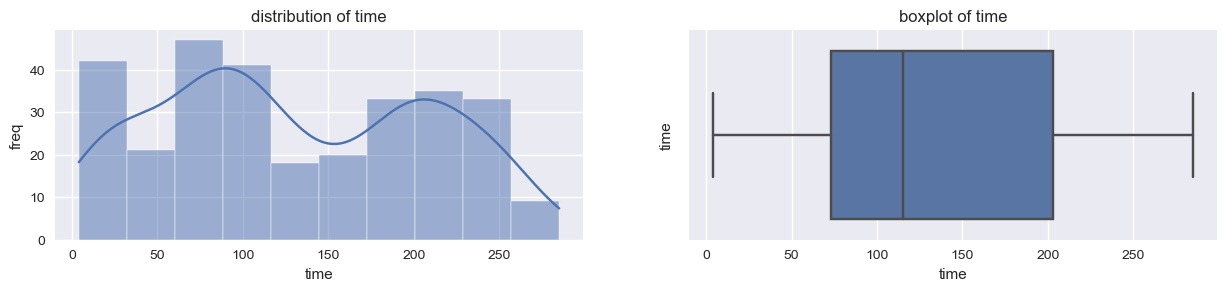

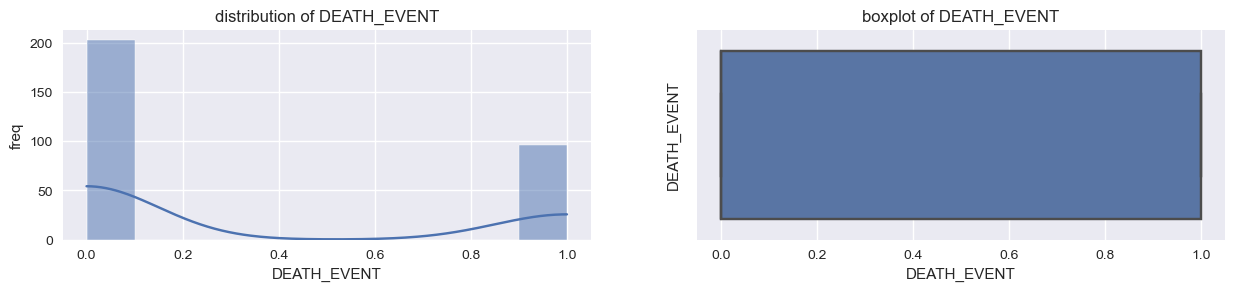

In [29]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()


# Splitting Data


In [30]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (239, 12)
The Shape of x_test : (60, 12)
The Shape of y_train : (239, 1)
The Shape of y_test : (60, 1)


# Logestic Regression

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88        41
         1.0       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88        41
         1.0       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



# DECISION TREE CLASSIFIER

In [38]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [39]:
y_predd = classifier.predict(x_test)
y_predd

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  1]
 [10  9]]
0.8166666666666667


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88        41
         1.0       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



# Support Vector Classifier (SVM)

In [42]:
svm = SVC(C = 0.6, random_state = 42, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=0.6, random_state=42)

In [43]:
y_pred = svm.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  1]
 [14  5]]
0.75


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84        41
         1.0       0.83      0.26      0.40        19

    accuracy                           0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60



# K Nearest Neighbor

In [46]:
kn = KNeighborsClassifier(n_neighbors=6)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
y_pred = classifier.predict(x_test)
print(y_pred)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  1]
 [ 9 10]]
0.8333333333333334


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89        41
         1.0       0.91      0.53      0.67        19

    accuracy                           0.83        60
   macro avg       0.86      0.75      0.78        60
weighted avg       0.85      0.83      0.82        60



# XGBoost

In [50]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[39  2]
 [ 7 12]]
0.85


In [53]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005591
0:	learn: 0.6891915	total: 161ms	remaining: 2m 41s
1:	learn: 0.6840010	total: 163ms	remaining: 1m 21s
2:	learn: 0.6795498	total: 165ms	remaining: 54.8s
3:	learn: 0.6753148	total: 167ms	remaining: 41.6s
4:	learn: 0.6700963	total: 169ms	remaining: 33.6s
5:	learn: 0.6644587	total: 171ms	remaining: 28.3s
6:	learn: 0.6596710	total: 173ms	remaining: 24.5s
7:	learn: 0.6553129	total: 175ms	remaining: 21.7s
8:	learn: 0.6504748	total: 177ms	remaining: 19.4s
9:	learn: 0.6458766	total: 179ms	remaining: 17.7s
10:	learn: 0.6421360	total: 181ms	remaining: 16.3s
11:	learn: 0.6374152	total: 184ms	remaining: 15.1s
12:	learn: 0.6332144	total: 186ms	remaining: 14.1s
13:	learn: 0.6298206	total: 188ms	remaining: 13.3s
14:	learn: 0.6268490	total: 191ms	remaining: 12.5s
15:	learn: 0.6230046	total: 193ms	remaining: 11.9s
16:	learn: 0.6183063	total: 196ms	remaining: 11.3s
17:	learn: 0.6145312	total: 198ms	remaining: 10.8s
18:	learn: 0.6108425	total: 200ms	remaining: 10.3s
19:	learn

In [54]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[39  2]
 [ 9 10]]
0.8166666666666667


# Model Evaluation

In [56]:
mylist

[0.8166666666666667,
 0.8166666666666667,
 0.75,
 0.8333333333333334,
 0.85,
 0.8166666666666667]

In [57]:
mylist2 = ["Logestic Regression", "DecisionTree", "SupportVector", "KNearestNeighbours", "RandomForest", "XGBOOST","CATBOOST"]

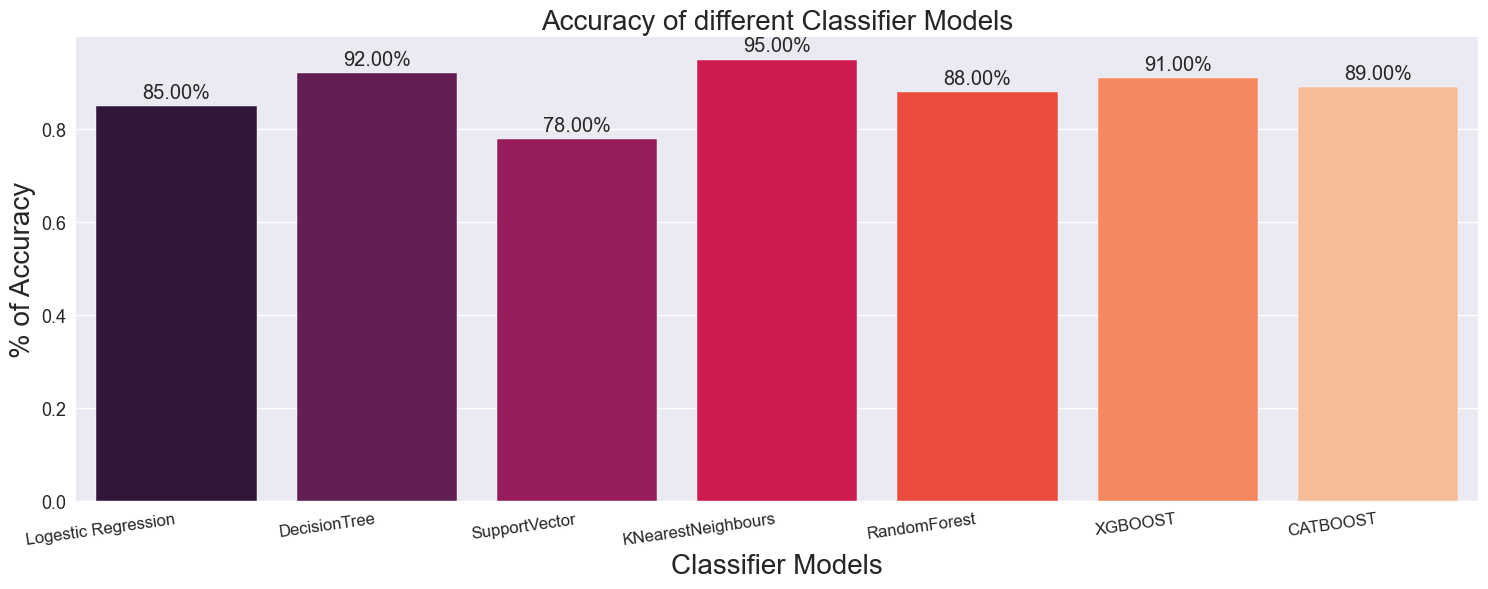

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
mylist = [0.85, 0.92, 0.78, 0.95, 0.88, 0.91, 0.89]  # Example accuracy percentages
mylist2 = ["Logestic Regression", "DecisionTree", "SupportVector", "KNearestNeighbours", "RandomForest", "XGBOOST", "CATBOOST"]

plt.rcParams['figure.figsize'] = 15, 6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette="rocket", saturation=1.5)

plt.xlabel("Classifier Models", fontsize=20)
plt.ylabel("% of Accuracy", fontsize=20)
plt.title("Accuracy of different Classifier Models", fontsize=20)
plt.xticks(fontsize=12, rotation=8, ha='right')  # Adjust rotation and alignment as needed
plt.yticks(fontsize=13)

# Annotate bars with values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')

plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()
